## Definição do Problema

### **Problema:** Prever o preço de casas com base em suas características.
### **Objetivo:** Construir um modelo de regressão que forneça estimativas precisas dos preços de casas com base em atributos como número de quartos, área, localização, etc.

## Importação de libs que serão utilizadas no notebook

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

## Carga do dataset

O Dataset utilizado é o The Boston Housing Dataset

In [2]:
# Carregar o dataset em um dataframe
url = 'https://raw.githubusercontent.com/m4cneto/puc_mvp_12_2024/refs/heads/main/boston.csv'
df = pd.read_csv(url)

### Análise Exploratória

#### Informações do dataset


In [3]:
# Mostra as primeiras linhas do dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# Mostra as dimensões do dataset
df.shape

(506, 14)

In [5]:
# Mostra as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


#### Limpeza e Preparação dos Dados

In [6]:
# Removendo valores nulos\NaN
df = df.dropna()

In [7]:
# Separando os dados em recursos (X) e alvo (y). MEDV é a variável que representa o preço das casas.
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [8]:
# Dividindo o dataset em treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Normalizando os dados para colocar todas as variáveis na mesma escala, o que é especialmente importante para algoritmos baseados em distância.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Seleção de features e Modelagem

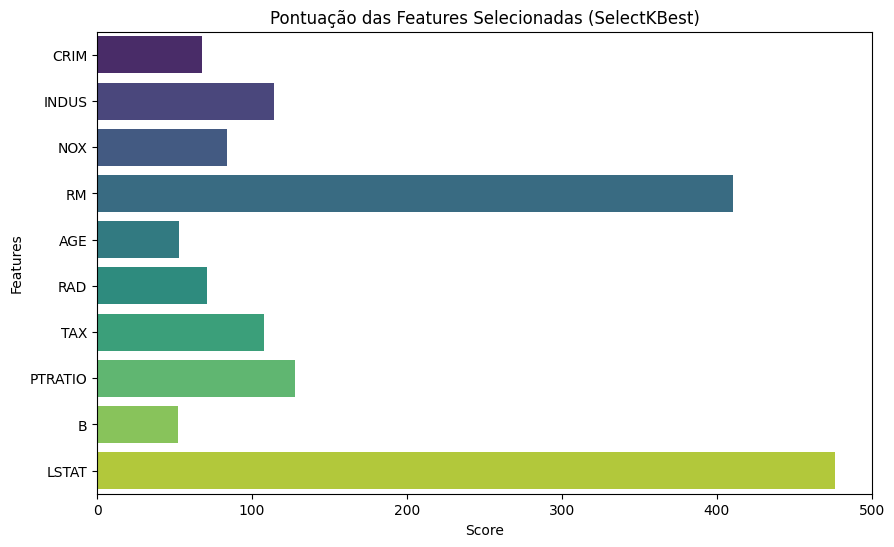

In [10]:
# Selecionando as 10 melhores features com base na correlação estatística usando o método SelectKBest
# O SelectKBest usa um teste estatístico (f_regression) para determinar a importância de cada feature.
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Visualização da pontuação das features selecionadas
feature_scores = selector.scores_
selected_features = X.columns[selector.get_support()]

# Gráfico de barras para visualizar quais features foram mais importantes
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_scores[selector.get_support()], y=selected_features, palette='viridis')
plt.title("Pontuação das Features Selecionadas (SelectKBest)")
plt.xlabel("Score")
plt.ylabel("Features")
plt.show()

#### Modelagem

In [11]:
# Treinando dois modelos: Regressão Linear e Random Forest, para comparar a simplicidade de um modelo linear com a complexidade de um modelo não linear.

# Modelo 1: Regressão Linear
# A regressão linear é escolhida como baseline devido à sua simplicidade e interpretabilidade.
lr = LinearRegression()
lr.fit(X_train_selected, y_train)

# Modelo 2: Random Forest
# O Random Forest é utilizado por sua capacidade de modelar relações complexas e lidar bem com dados não linearmente separáveis.
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_selected, y_train)

# Fazendo previsões com os dois modelos no conjunto de teste
lr_predictions = lr.predict(X_test_selected)
rf_predictions = rf.predict(X_test_selected)

# Calculando as métricas de avaliação para os modelos: MSE (erro quadratico médio) e R² (coeficiente de determinação)
# O MSE nos ajuda a entender a magnitude do erro e o R² nos indica a proporção da variação dos dados que é explicada pelo modelo.
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)


#### Avaliação dos Modelos

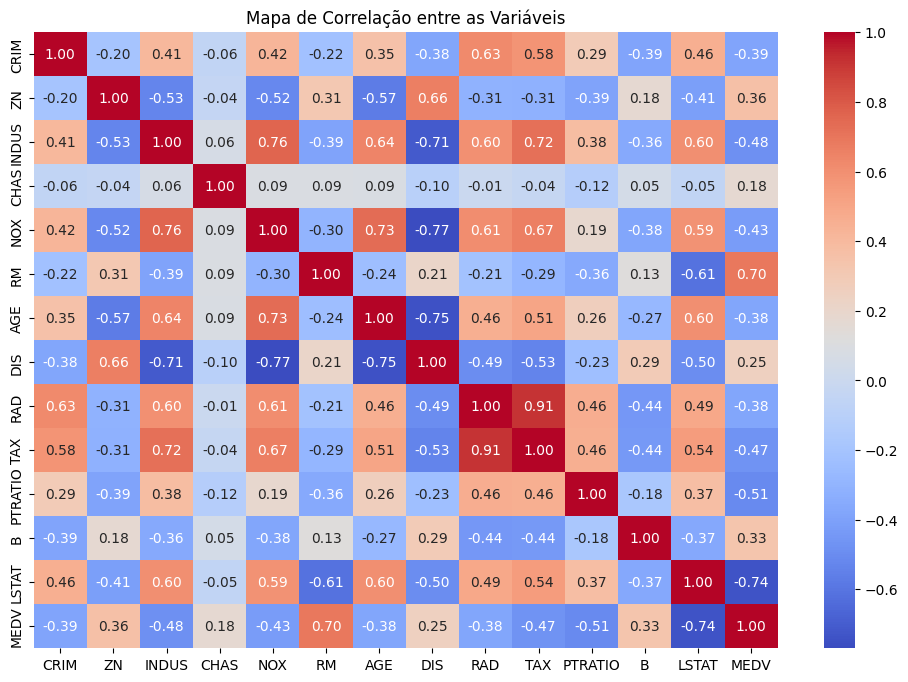

In [12]:
# Visualizando a correlação entre as variáveis do dataset
# O gráfico de calor ajuda a entender como as variáveis se relacionam entre si.

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlação entre as Variáveis")
plt.show()

Resultados do Modelo de Regressão Linear:
MSE: 27.22, R2: 0.63


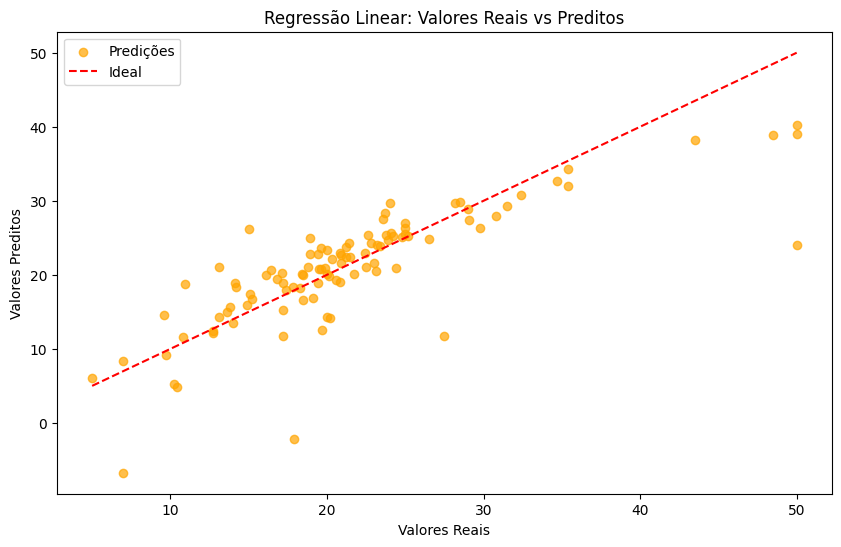

In [13]:
# Exibindo os resultados para o modelo de regressão linear
print("Resultados do Modelo de Regressão Linear:")
print(f"MSE: {lr_mse:.2f}, R2: {lr_r2:.2f}")

# Grafico para comparar os valores reais e as previsões do modelo de regressão linear
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, alpha=0.7, color='orange', label='Predições')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Regressão Linear: Valores Reais vs Preditos")
plt.legend()
plt.show()


Resultados do Random Forest:
MSE: 9.62, R2: 0.87


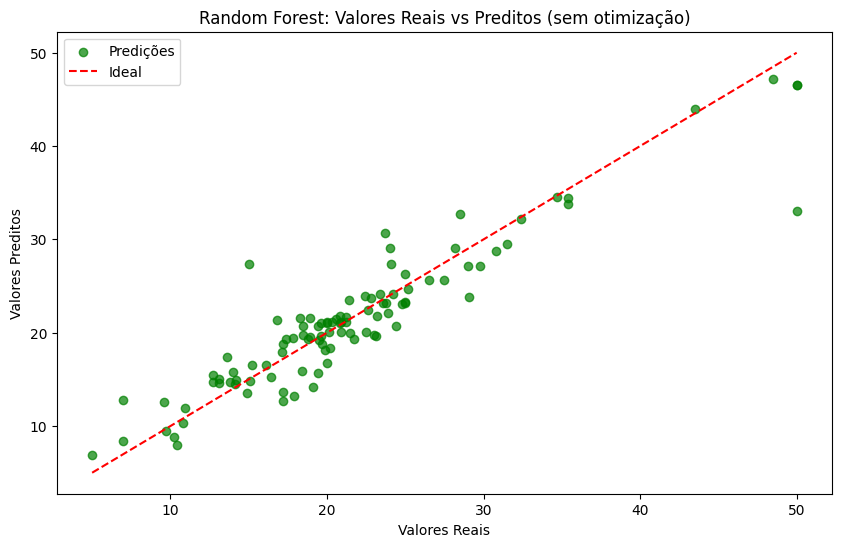

In [14]:
# Exibindo os resultados para o modelo de random forest
print("\nResultados do Random Forest:")
print(f"MSE: {rf_mse:.2f}, R2: {rf_r2:.2f}")

# Grafico para comparar os valores reais e as previsões do modelo random forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.7, color='green', label='Predições')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Random Forest: Valores Reais vs Preditos (sem otimização)")
plt.legend()
plt.show()

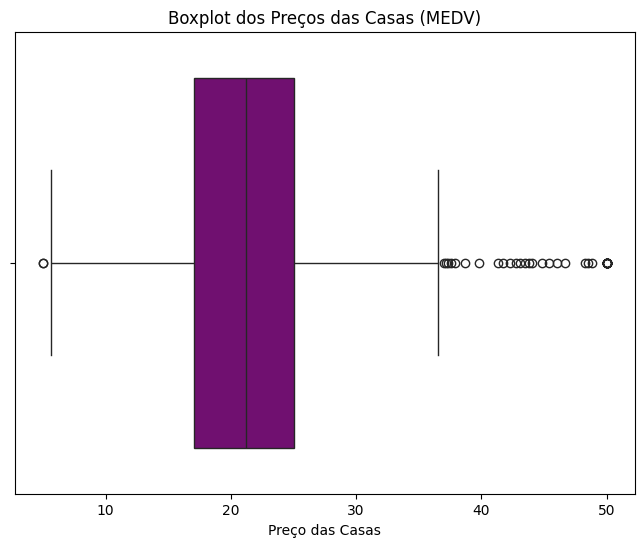

In [15]:
# Visualização detalhada da distribuição dos preços das casas para verificar a presença de outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MEDV'], color='purple')
plt.title("Boxplot dos Preços das Casas (MEDV)")
plt.xlabel("Preço das Casas")
plt.show()

#### Conclusão


Neste estudo, foi construido modelos para prever o preço de casas utilizando o Boston Housing Dataset.
Comparando os resultados entre a regressão linear e o random forest, chegamos as seguintes conclusões:

**Desempenho dos Modelos**

1.   Regressão Linear: Simples e interpretável, porém apresentou desempenho inferior
  *   Métricas: MSE = 27.22
  *   R² = 0.63
  *   Demonstrou dificuldades em capturar relações não-lineares nos dados.


2.   Random Forest: Modelo mais preciso e robusto, capturando padrões complexos.
  *   Métricas: MSE = 9.62
  *   R² = 0.87
  *   Apresentou previsões muito mais próximas dos valores reais.



**Fatores Importantes**
  *   Variáveis como número de quartos (**RM**) possuem forte impacto positivo no preço das casas.
  *   Fatores como nível socioeconômico (**LSTAT**) e poluição ambiental (**NOX**) têm impacto negativo.
A análise exploratória mostrou correlações importantes, como entre RAD e TAX, tratadas pela seleção de atributos.

**Resultado**
O modelo Random Forest mostrou ser o mais adequado para prever os preços de casas, oferecendo maior precisão e robustez comparado com a regressão linear.